In [1]:
#Needed imports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting tool


# Linear Bézier Curve

$$
B(t) = (1 - t) P_0 + t P_1
$$

In [2]:
def linear_bezier(P0,P1,t):
    return (1 - t) * P0 + P1 * t

In [3]:
# Test positions

P0 = np.array([1, 2, 3])
P1 = np.array([4, 5, 6])


In [4]:

def plot_linear_bezier(P0, P1, T0, T):
    dt = 0.001  # Time step
    
    t_values = np.arange(T0, T + dt, dt)
    
    points = np.array([linear_bezier(P0, P1, t) for t in t_values])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') 
    
    ax.plot(points[:, 0], points[:, 1], points[:, 2], label='Linear Bézier Curve')
    ax.scatter([P0[0], P1[0]], [P0[1], P1[1]], [P0[2], P1[2]], color='red', label='Control Points')
    
    #plot 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title('3D Linear Bézier Curve')
    plt.show()
    

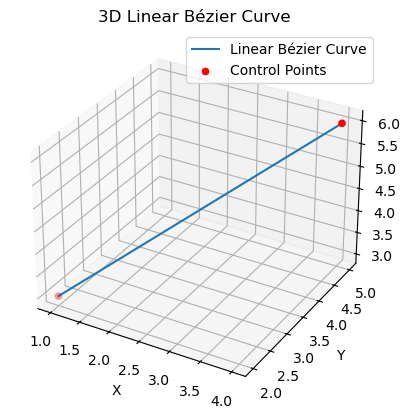

In [5]:
# Define start and end times
T0 = 0.0  # Start time
T = 1.0   # End time

# Execute the plotting function
plot_linear_bezier(P0, P1, T0, T)

# Quadratic Bézier Curve

$$
B(t) = (1 - t)^2 P_0 + 2(1 - t)t P_1 + t^2 P_2
$$

In [6]:
def quadratic_bezier(P0, P1, P2, t):
    return (1 - t)**2 * P0 + 2 * (1 - t) * t * P1 + t**2 * P2


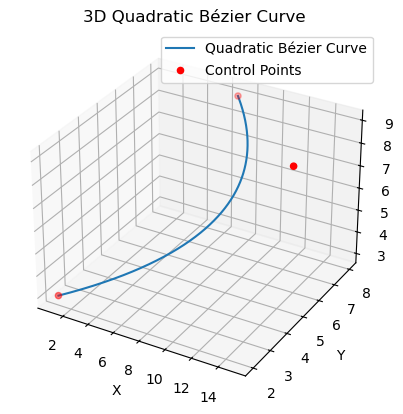

In [7]:
def plot_quadratic_bezier(P0, P1, P2, T0, T):
    dt = 0.001  # Time step
    t_values = np.arange(T0, T + dt, dt)
    points = np.array([quadratic_bezier(P0, P1, P2, t) for t in t_values])

    # Plotting the curve
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot
    ax.plot(points[:, 0], points[:, 1], points[:, 2], label='Quadratic Bézier Curve')
    ax.scatter([P0[0], P1[0], P2[0]], [P0[1], P1[1], P2[1]], [P0[2], P2[2], P2[2]], color='red', label='Control Points')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title('3D Quadratic Bézier Curve')
    plt.show()

# Define points in 3D
P0 = np.array([1, 2, 3])
P1 = np.array([15, 5, 6])
P2 = np.array([7, 8, 9])

# Define start and end times
T0 = 0.0  # Start time
T = 1.0   # End time

# Execute the plotting function
plot_quadratic_bezier(P0, P1, P2, T0, T)

In [8]:
#Manipulator parameters
L1 = 5.0  # Length of the first segment
L2 = 0.8  # Length of the second segment
L3 = 0.5  # Length of the third segment
L4 = 0.8  # Length of the fourth segment

In [9]:
def inverse_kinematics(px, py, pz):
    
    # Calculate r and eta
    r = np.sqrt(px**2 + py**2)
    eta = np.arctan2(py, px)

    # Check if the point is reachable
    if r > L1 + L2 + L3 + L4:
        raise ValueError("The point is not reachable by the manipulator.")

    # Calculate q1, q2, q3
    q1 = eta - np.arctan2(-L4, np.sqrt(r**2 - L4**2))
    q2 = np.cos(q1) * px + np.sin(q1) * py - L2
    q3 = L1 - L3 - pz 

    return q1, q2, q3

In [10]:
def quadratic_bezier(P0, P1, P2, num_points):
    bezier_points = []
    for t in np.linspace(0, 1, num_points):
        B = (1 - t)**2 * P0 + 2 * (1 - t) * t * P1 + t**2 * P2
        bezier_points.append(B)
    return bezier_points

In [11]:

def calculate_joint_angles(bezier_points):
    q1_values, q2_values, q3_values = [], [], []
    for point in bezier_points:
        px, py, pz = point
        q1, q2, q3 = inverse_kinematics(px, py, pz)
        q1_values.append(q1)
        q2_values.append(q2)
        q3_values.append(q3)
    return q1_values, q2_values, q3_values


In [12]:
# Example with three points


P0 = np.array([1, 2, 1])
P1 = np.array([2, 3, 4])
P2 = np.array([3, 4, 3])
num_points = 100  # Number of points along the Bézier curve

bezier_points = quadratic_bezier(P0, P1, P2, num_points)
q1_values, q2_values, q3_values = calculate_joint_angles(bezier_points)
time_steps = np.linspace(0, 1, num_points) 



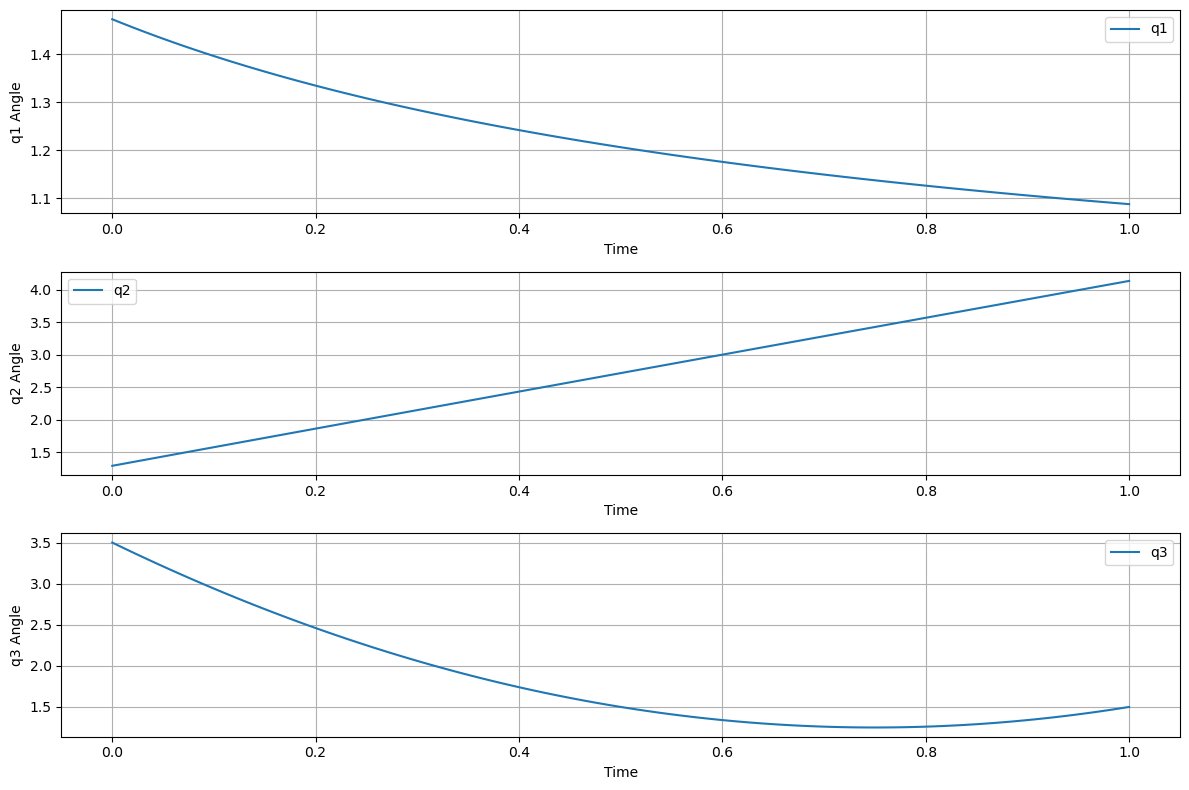

In [13]:
def plot_joint_angles(q1_values, q2_values, q3_values, time_steps):

    plt.figure(figsize=(12, 8))

    # Plotting q1
    plt.subplot(3, 1, 1)
    plt.plot(time_steps, q1_values, label='q1')
    plt.xlabel('Time')
    plt.ylabel('q1 Angle')
    plt.grid(True)
    plt.legend()

    # Plotting q2
    plt.subplot(3, 1, 2)
    plt.plot(time_steps, q2_values, label='q2')
    plt.xlabel('Time')
    plt.ylabel('q2 Angle')
    plt.grid(True)
    plt.legend()

    # Plotting q3
    plt.subplot(3, 1, 3)
    plt.plot(time_steps, q3_values, label='q3')
    plt.xlabel('Time')
    plt.ylabel('q3 Angle')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_joint_angles(q1_values, q2_values, q3_values, time_steps)

In [14]:
def plot_joint_angles_and_bezier_curve(q1_values, q2_values, q3_values, bezier_points, time_steps):
    
    fig = plt.figure(figsize=(15, 10))

    # Plotting q1
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.plot(time_steps, q1_values, label='q1')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('q1 Angle')
    ax1.grid(True)
    ax1.legend()

    # Plotting q2
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.plot(time_steps, q2_values, label='q2')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('q2 Angle')
    ax2.grid(True)
    ax2.legend()

    # Plotting q3
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.plot(time_steps, q3_values, label='q3')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('q3 Angle')
    ax3.grid(True)
    ax3.legend()

    # Plotting the Bézier curve in 3D
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    bezier_points = np.array(bezier_points)
    ax4.plot(bezier_points[:, 0], bezier_points[:, 1], bezier_points[:, 2], label='Bézier Curve')
    ax4.scatter(bezier_points[:, 0], bezier_points[:, 1], bezier_points[:, 2], color='red', s=10)
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_zlabel('Z')
    ax4.legend()

    plt.tight_layout()
    plt.show()

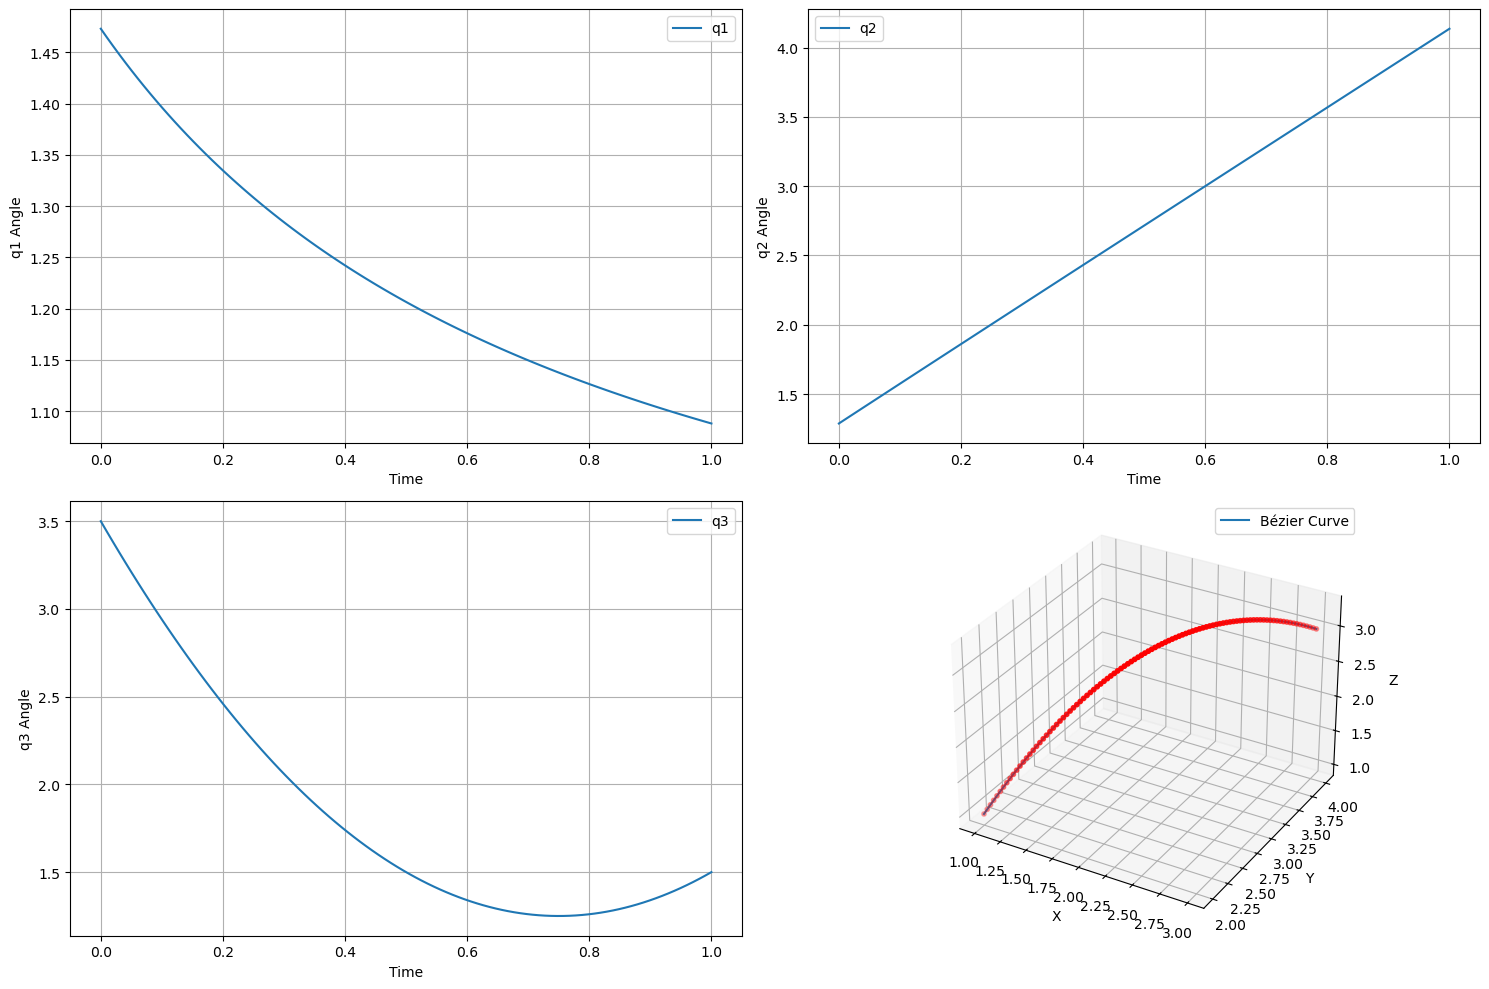

In [15]:
plot_joint_angles_and_bezier_curve(q1_values, q2_values, q3_values, bezier_points, time_steps)